Ridge Regression (L2 Regularization)

Definition:
Ridge regression is a type of linear regression that adds a penalty on the square of the coefficients to reduce overfitting and shrink their values.

👉 It makes coefficients smaller but does not make them zero.

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import mean_squared_error

In [47]:
np.random.seed(0)
x=np.random.randn(200,6)
coef=np.array([3.2,-1.5,0.7,0,2.8,-0.5])

y=x.dot(coef) + np.random.randn(200)*0.6

In [48]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.25, random_state=42
)

In [49]:
ridge = Ridge(alpha=1.0)
ridge.fit(x_train,y_train)
y_pred=ridge.predict(x_test)

In [50]:
print("MSE (alpha = 1.0):", mean_squared_error(y_test, y_pred))
print("Coefficients (alpha = 1.0):", ridge.coef_)


param_grid = {"alpha": [0.001, 0.01, 0.1, 1, 10, 100, 500]}


grid = GridSearchCV(Ridge(), param_grid, cv=5,
                    scoring="neg_mean_squared_error")


grid.fit(x_train, y_train)
best_ridge = grid.best_estimator_
pred_best = best_ridge.predict(x_test)

MSE (alpha = 1.0): 0.4598023023692493
Coefficients (alpha = 1.0): [ 2.96587537 -1.64397225  0.66532484  0.06289239  2.83625348 -0.46900939]


In [51]:
print("Best alpha selected:", grid.best_params_["alpha"])
print("MSE (best alpha):", mean_squared_error(y_test, pred_best))
print("Coefficients (best alpha):", best_ridge.coef_)

Best alpha selected: 0.001
MSE (best alpha): 0.4509955766069163
Coefficients (best alpha): [ 2.9849965  -1.65395975  0.67045849  0.06557375  2.85454007 -0.47306529]


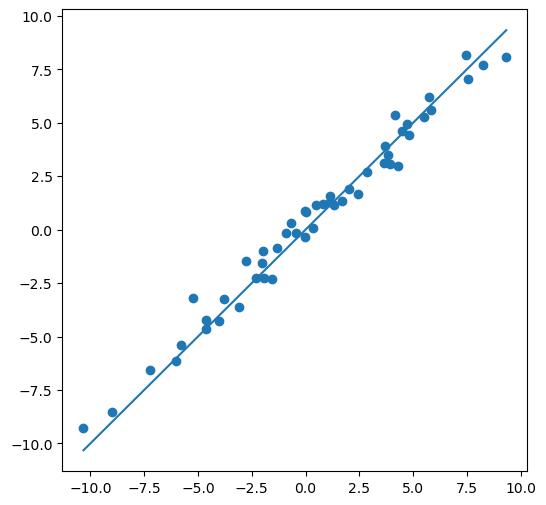

In [52]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val])

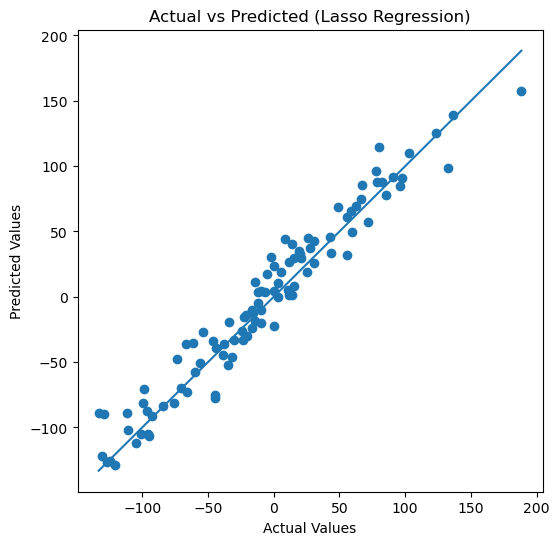

In [58]:
y_pred = lasso.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred)

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val])

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Lasso Regression)")
plt.show()

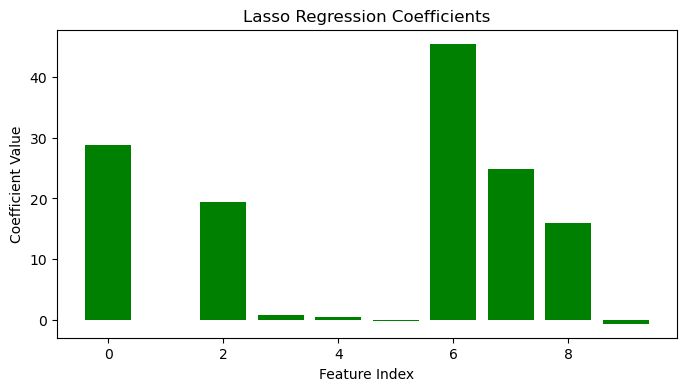

In [59]:
plt.figure(figsize=(8, 4))
plt.bar(range(len(lasso.coef_)), lasso.coef_, color="green")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Lasso Regression Coefficients")
plt.show()

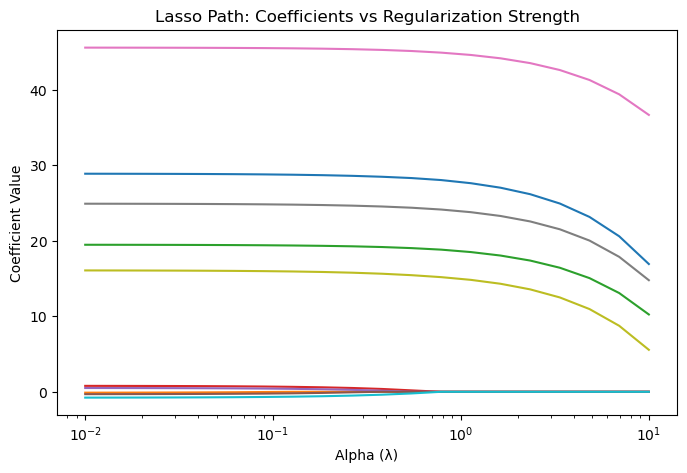

In [60]:
alphas = np.logspace(-2, 1, 20)
coefficients = []

for a in alphas:
    model = Lasso(alpha=a)
    model.fit(X_train, y_train)
    coefficients.append(model.coef_)

coefficients = np.array(coefficients)

plt.figure(figsize=(8, 5))
for i in range(coefficients.shape[1]):
    plt.plot(alphas, coefficients[:, i])
plt.xscale("log")
plt.xlabel("Alpha (λ)")
plt.ylabel("Coefficient Value")
plt.title("Lasso Path: Coefficients vs Regularization Strength")
plt.show()